### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

### Import Dataset

In [2]:
from keras.datasets import cifar10

data = cifar10.load_data()
data

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [3]:
(X_train, y_train), (X_test, y_test) = data

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [5]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [6]:
y_train = y_train.flatten()
print(y_train)
y_test = y_test.flatten()
print(y_test)

[6 9 9 ... 9 1 1]
[3 8 8 ... 5 1 7]


In [7]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

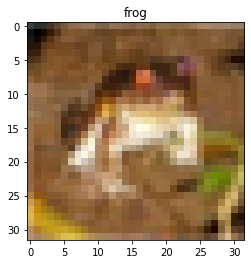

In [8]:
plt.imshow(X_train[0])
plt.title(labels[y_train[0]])
plt.show()

### Normalize the Data

In [9]:
X_train = X_train / 255
X_test = X_test / 255

### CNN with ANN

In [10]:
cnn1 = Sequential()
# Feature Extraction
cnn1.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), activation='relu'))
cnn1.add(MaxPool2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))
cnn1.add(Conv2D(128, (3, 3), activation='relu'))
cnn1.add(MaxPool2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))
cnn1.add(Flatten())
# Classification
cnn1.add(Dropout(0.2))
cnn1.add(Dense(10, activation="softmax"))  # 2 classes (cats or dogs): 1 neuron is enough
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [11]:
cnn1.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
hist = cnn1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)

2022-03-01 16:56:16.056617: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-03-01 16:56:16.695260: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50
1563/1563 [==============================] - 10s 4ms/step - loss: 1.4700 - acc: 0.4751 - val_loss: 1.1771 - val_acc: 0.5867
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1521 - acc: 0.5982 - val_loss: 1.0191 - val_acc: 0.6420
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0310 - acc: 0.6413 - val_loss: 0.9681 - val_acc: 0.6660
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9690 - acc: 0.6647 - val_loss: 0.9178 - val_acc: 0.6882
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9226 - acc: 0.6819 - val_loss: 0.8574 - val_acc: 0.7044
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8882 - acc: 0.6919 - val_loss: 0.8772 - val_acc: 0.6931
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8601 - acc: 0.7001 - val_loss: 0.8354 - val_acc: 0.7169
Epoch 8/50
1563/1563 [==============================] - 6s 4m

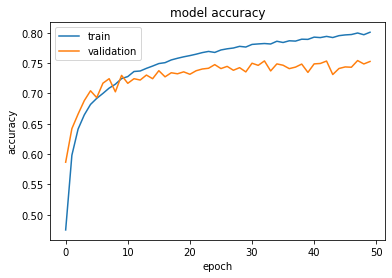

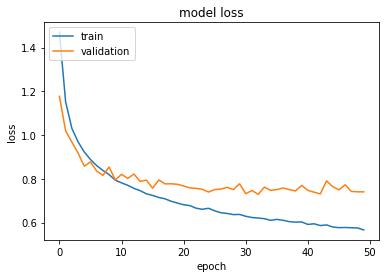

In [12]:
#  "Accuracy"
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
cnn2 = Sequential()
# Feature Extraction
cnn2.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), activation='relu', padding="same"))
cnn2.add(MaxPool2D(pool_size=(2, 2)))
cnn2.add(Dropout(0.2))
cnn2.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
cnn2.add(MaxPool2D(pool_size=(2, 2)))
cnn2.add(Dropout(0.2))
cnn2.add(Flatten())
# Classification
cnn2.add(Dense(128, activation='relu'))
cnn2.add(Dropout(0.2))
cnn2.add(Dense(10, activation="softmax"))
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 128)        

In [14]:
cnn2.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
hist = cnn2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)

2022-03-01 17:01:42.690312: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-03-01 17:01:43.297966: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4687 - acc: 0.4701 - val_loss: 1.1216 - val_acc: 0.6033
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1128 - acc: 0.6059 - val_loss: 1.0075 - val_acc: 0.6421
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9760 - acc: 0.6556 - val_loss: 0.9254 - val_acc: 0.6742
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8913 - acc: 0.6866 - val_loss: 0.8971 - val_acc: 0.6876
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8164 - acc: 0.7135 - val_loss: 0.8264 - val_acc: 0.7163
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7593 - acc: 0.7310 - val_loss: 0.8411 - val_acc: 0.7113
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7185 - acc: 0.7460 - val_loss: 0.8169 - val_acc: 0.7194
Epoch 8/50
1563/1563 [==============================] - 7s 4ms

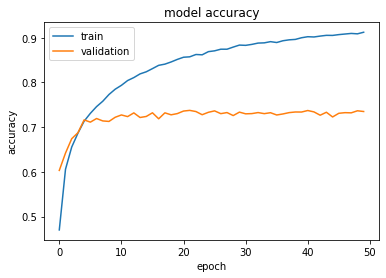

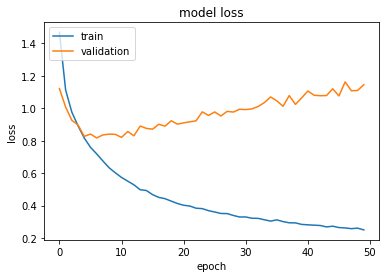

In [15]:
#  "Accuracy"
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
cnn3 = Sequential()
#Feature Extraction
#Block1
cnn3.add(Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3), padding="same"))
cnn3.add(BatchNormalization())
cnn3.add(MaxPool2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))
#Block2
cnn3.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
cnn3.add(BatchNormalization())
cnn3.add(MaxPool2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.3))
#Block3
cnn3.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
cnn3.add(BatchNormalization())
cnn3.add(MaxPool2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

#Classification
cnn3.add(Dense(512, activation="relu"))
cnn3.add(Dropout(0.4))
cnn3.add(Dense(10, activation="softmax"))
cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)      

In [17]:
cnn3.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
hist = cnn3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=2)

2022-03-01 17:07:34.716013: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/100
1563/1563 - 7s - loss: 1.6451 - accuracy: 0.4224 - val_loss: 1.3712 - val_accuracy: 0.5217 - 7s/epoch - 5ms/step
Epoch 2/100
1563/1563 - 6s - loss: 1.3101 - accuracy: 0.5337 - val_loss: 1.6604 - val_accuracy: 0.5001 - 6s/epoch - 4ms/step
Epoch 3/100
1563/1563 - 6s - loss: 1.1600 - accuracy: 0.5893 - val_loss: 1.8935 - val_accuracy: 0.4691 - 6s/epoch - 4ms/step
Epoch 4/100
1563/1563 - 6s - loss: 1.0671 - accuracy: 0.6255 - val_loss: 1.1845 - val_accuracy: 0.6136 - 6s/epoch - 4ms/step
Epoch 5/100
1563/1563 - 6s - loss: 0.9876 - accuracy: 0.6575 - val_loss: 1.0266 - val_accuracy: 0.6516 - 6s/epoch - 4ms/step
Epoch 6/100
1563/1563 - 6s - loss: 0.9300 - accuracy: 0.6751 - val_loss: 1.2163 - val_accuracy: 0.6205 - 6s/epoch - 4ms/step
Epoch 7/100
1563/1563 - 6s - loss: 0.8936 - accuracy: 0.6914 - val_loss: 0.8217 - val_accuracy: 0.7192 - 6s/epoch - 4ms/step
Epoch 8/100
1563/1563 - 6s - loss: 0.8405 - accuracy: 0.7107 - val_loss: 0.9246 - val_accuracy: 0.6849 - 6s/epoch - 4ms/step


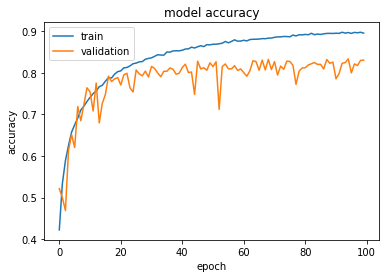

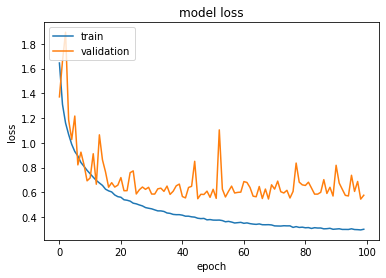

In [18]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
cnn4 = Sequential()
#Feature Extraction
#Block1
cnn4.add(Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform", input_shape=(32, 32, 3), padding="same"))
cnn4.add(BatchNormalization())
cnn4.add(MaxPool2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))
#Block2
cnn4.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
cnn4.add(BatchNormalization())
cnn4.add(MaxPool2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.3))
#Block3
cnn4.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
cnn4.add(BatchNormalization())
cnn4.add(MaxPool2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.4))

cnn4.add(Flatten())

#Classification
cnn4.add(Dense(512, activation="relu"))
cnn4.add(Dropout(0.4))
cnn4.add(Dense(10, activation="softmax"))
cnn4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 16, 16, 64)      

In [20]:
cnn4.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
hist = cnn4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=2)

Epoch 1/100
1563/1563 - 8s - loss: 1.6267 - accuracy: 0.4252 - val_loss: 1.3212 - val_accuracy: 0.5491 - 8s/epoch - 5ms/step
Epoch 2/100
1563/1563 - 7s - loss: 1.2595 - accuracy: 0.5513 - val_loss: 1.1925 - val_accuracy: 0.6048 - 7s/epoch - 4ms/step
Epoch 3/100
1563/1563 - 7s - loss: 1.1211 - accuracy: 0.6038 - val_loss: 0.9583 - val_accuracy: 0.6666 - 7s/epoch - 4ms/step
Epoch 4/100
1563/1563 - 7s - loss: 1.0248 - accuracy: 0.6421 - val_loss: 0.9832 - val_accuracy: 0.6746 - 7s/epoch - 4ms/step
Epoch 5/100
1563/1563 - 7s - loss: 0.9612 - accuracy: 0.6653 - val_loss: 0.8722 - val_accuracy: 0.6979 - 7s/epoch - 4ms/step
Epoch 6/100
1563/1563 - 7s - loss: 0.9085 - accuracy: 0.6862 - val_loss: 1.1070 - val_accuracy: 0.6495 - 7s/epoch - 4ms/step
Epoch 7/100
1563/1563 - 7s - loss: 0.8696 - accuracy: 0.6980 - val_loss: 0.7574 - val_accuracy: 0.7397 - 7s/epoch - 4ms/step
Epoch 8/100
1563/1563 - 7s - loss: 0.8240 - accuracy: 0.7134 - val_loss: 0.6936 - val_accuracy: 0.7597 - 7s/epoch - 4ms/step


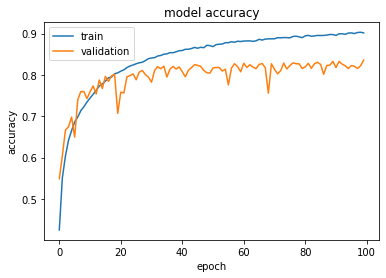

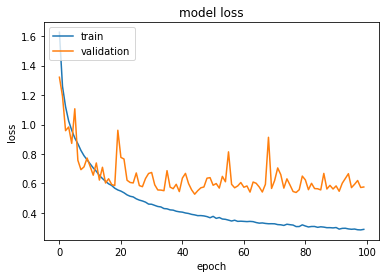

In [21]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_preds = cnn3.predict(X_test)
y_preds

array([[1.5099726e-04, 2.1390044e-05, 5.7879195e-04, ..., 2.3084201e-06,
        6.1614104e-05, 4.7475505e-06],
       [1.2948223e-06, 1.0095995e-03, 1.0525720e-11, ..., 1.0908898e-15,
        9.9898905e-01, 2.6891025e-08],
       [1.7422959e-05, 1.3548855e-03, 9.5594643e-10, ..., 1.7135156e-10,
        9.9862659e-01, 1.1235388e-06],
       ...,
       [3.6876893e-10, 1.1691466e-11, 8.9737528e-05, ..., 4.0400144e-05,
        1.0319470e-08, 3.4780015e-10],
       [6.1935402e-04, 9.9928230e-01, 3.2222277e-05, ..., 6.2802360e-07,
        1.6256729e-06, 4.7667607e-05],
       [1.2711194e-13, 5.0189147e-17, 2.6563843e-10, ..., 9.9963593e-01,
        2.5910772e-16, 3.5536018e-15]], dtype=float32)

In [23]:
y_preds_final = np.argmax(y_preds, axis=1)
y_preds_final

array([3, 8, 8, ..., 5, 1, 7])

In [24]:
print("Accuracy: ", accuracy_score(y_test, y_preds_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds_final))
print("Classification Report:\n", classification_report(y_test, y_preds_final))

Accuracy:  0.8306
Confusion Matrix:
 [[881   9  21  10   9   7   9   4  32  18]
 [  5 917   0   3   0   2  11   0  14  48]
 [ 48   2 750  27  49  41  68   9   2   4]
 [ 12   4  46 670  46 120  73  11  11   7]
 [  9   1  51  32 807  20  56  18   6   0]
 [  9   2  29 155  33 717  33  17   4   1]
 [  1   1  16  31   7   6 932   2   3   1]
 [  9   1  25  31  47  37  14 830   2   4]
 [ 32   6   4  10   2   1   7   0 927  11]
 [ 17  52   4   5   3   6  13   3  22 875]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.92      0.92      0.92      1000
           2       0.79      0.75      0.77      1000
           3       0.69      0.67      0.68      1000
           4       0.80      0.81      0.81      1000
           5       0.75      0.72      0.73      1000
           6       0.77      0.93      0.84      1000
           7       0.93      0.83      0.88      1000
           8       0.

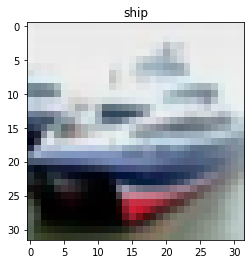

ship


In [25]:
plt.imshow(X_test[1])
plt.title(labels[y_test[1]])
plt.show()

print(labels[y_preds_final[1]])

In [27]:
y_preds = cnn4.predict(X_test)
y_preds

array([[3.47996037e-03, 3.13661247e-03, 6.37090183e-04, ...,
        7.75790191e-04, 3.68567323e-03, 4.09966847e-03],
       [1.93253840e-07, 9.93357040e-04, 1.03584976e-16, ...,
        9.82039680e-19, 9.99006450e-01, 3.71578182e-08],
       [4.85316180e-02, 1.14811126e-04, 4.21652339e-06, ...,
        8.61818705e-08, 9.51300502e-01, 3.78527511e-05],
       ...,
       [7.45532889e-12, 4.29051766e-14, 3.08075450e-08, ...,
        6.68118076e-08, 9.99913043e-13, 2.80202641e-12],
       [8.56476603e-04, 9.97325659e-01, 1.51891493e-06, ...,
        1.30664591e-06, 5.45326202e-07, 8.91787116e-04],
       [5.01750985e-12, 6.02978084e-12, 2.08662883e-08, ...,
        9.99698758e-01, 1.61005971e-14, 2.87726371e-10]], dtype=float32)

In [28]:
y_preds_final = np.argmax(y_preds, axis=1)
y_preds_final

array([3, 8, 8, ..., 5, 1, 7])

In [29]:
print("Accuracy: ", accuracy_score(y_test, y_preds_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds_final))
print("Classification Report:\n", classification_report(y_test, y_preds_final))

Accuracy:  0.8354
Confusion Matrix:
 [[873  10  22  11  12   2   5   6  43  16]
 [ 10 917   3   3   2   0   6   0  20  39]
 [ 49   0 773  31  50  40  33  12   9   3]
 [ 20   6  55 641  49 122  63  17  16  11]
 [  9   2  55  28 825  18  31  24   6   2]
 [ 12   1  29 121  30 743  28  25   5   6]
 [  5   2  28  27  12  11 905   2   7   1]
 [ 14   3  16  25  44  31   2 854   2   9]
 [ 35   9   6   1   2   2   4   2 927  12]
 [ 18  45   3   6   3   5   4   4  16 896]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1000
           1       0.92      0.92      0.92      1000
           2       0.78      0.77      0.78      1000
           3       0.72      0.64      0.68      1000
           4       0.80      0.82      0.81      1000
           5       0.76      0.74      0.75      1000
           6       0.84      0.91      0.87      1000
           7       0.90      0.85      0.88      1000
           8       0.

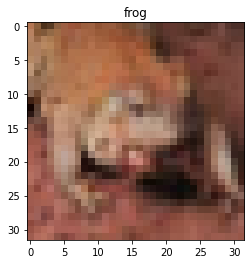

frog


In [30]:
plt.imshow(X_test[5])
plt.title(labels[y_test[5]])
plt.show()

print(labels[y_preds_final[5]])